
### Motive/Inspiration:
    
* To help credit card companies to be  able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Dataset Description
* The dataset contains transactions made by credit cards in September 2013 by european cardholders.
* This dataset presents transactions that occurred in two days, where  492 frauds out of 284,807 transactions. 
* The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

* It contains only numerical input variables which are the result of a PCA transformation. 
* Due to confidentiality issues,  the original features and more background information about the data  are not provided. 
* Features V1, V2, … V28 are the principal components obtained with PCA 
* The only features which have not been transformed with PCA are 'Time' and 'Amount'.
* Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
* The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 
* Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


    Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). 
Confusion matrix accuracy is not meaningful for unbalanced classification.

* Acknowledgements
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

In [1]:
#!pip uninstall scikit-learn

In [2]:
#pip install -U numpy scipy scikit-learn

In [3]:
#!pip install -U scikit-learn

In [4]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer


In [5]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [90]:
df.shape

(284807, 31)

In [6]:
#df.info()
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isnull().sum().sum()

0

we can observe yhat total number of null values present in the dataset are zero. Grteat! having zero null values in the dataset reduces quitean amount of effort .

Before performing any classification task, its really necessary to check the distribution of the classes.

C:\Users\Bharathi Aswath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Time', ylabel='Density'>

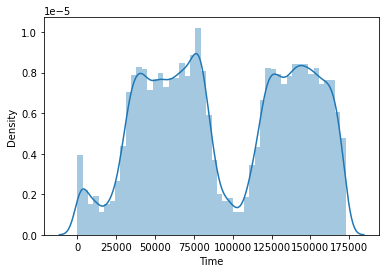

In [8]:
#df.hist(figsize = (20, 20))
#for i in df.columns
sns.distplot(df['Time'])


C:\Users\Bharathi Aswath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Time', ylabel='Density'>

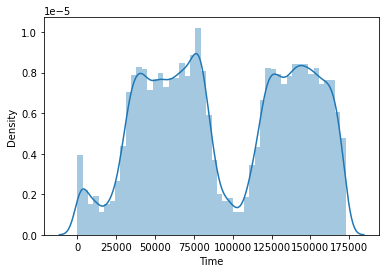

In [9]:
sns.distplot(df['Time'])


Why does the distribution of the class matter?

Suppose that out of 1000 data points if 990 data points are non-fraud and only 10 data points are fraud. If we are to build a Machine Learing Model for this case, by training the model on such dataset, the model will predict non-fraud for all cases because it has learnt the parameters on non-fraud cases which are in abundance. There are very less data points for fraud cases. But is this ML model good? It's not, because one of the most important aim of building such kind of Machine Learning Model is to accurately detect Fraud Cases so that the company can take instant action. By classifying all data points as non-fraud, there can be huge loss for the company.

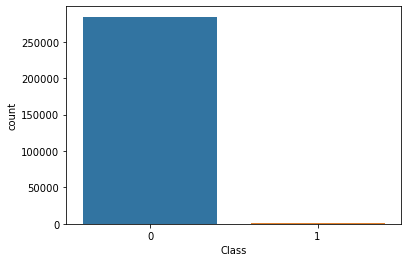

In [10]:
#finding classes

sns.countplot(x = 'Class', data = df)
plt.show()

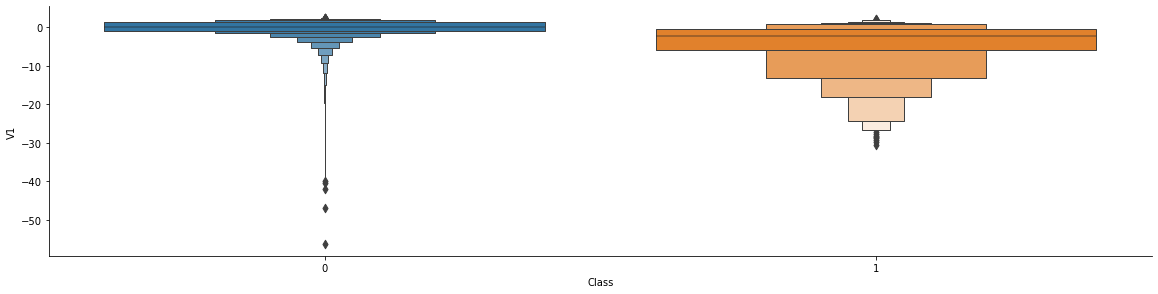

In [11]:
sns.catplot(y = "V1", x = "Class", data = df.sort_values("V1", ascending = False), kind="boxen", height = 4, aspect = 4)
plt.show()

In [12]:
#creating a diction ary to hold values:
fraud_and_not_fraud = {'Fraud' : df['Class'].value_counts()[1], 
                             'Not Fraud' : df['Class'].value_counts()[0]}

fraud_and_not_fraud

{'Fraud': 492, 'Not Fraud': 284315}

In [13]:
data = pd.Series(fraud_and_not_fraud).reset_index(name = 'value').rename(columns = {'index':'Fraud'})
data

,Fraud,value
0,Fraud,492
1,Not Fraud,284315


From the above two plots we can observe that most of the people were not-fraud and only 492 people were identified as fraud. This indicates high level of imbalance in the dataset. Thus we would have to use methods like SMOTE, OverSampling, UnderSampling etc to make an efficient model.

Now suppose that after applying the above methods, we want to evaluate our model, will we be using accuracy to evaluate our model?

Suppose we have a dataset where there is a huge difference between the number of positive classes and negative classes or in other words the dataset is imbalanced or have skewed targets. When we train the model on such a dataset, it will not have seen enough examples for the class, which is less in number. What will happen is that while predicting the target, it will always predict the class which is larger in number.

For example, Imagine the dataset used for classifying the tumor as Malignant or Benign has 90 images where the tumor is benign, and only 10 images where the tumor is malignant, or in other words the dataset has skewed targets. As there are more negative or ‘0’ class than positive or ‘1’ class (difference of 80), while performing predictions it will always predict the class to be negative or ‘0’ as there are not enough malignant images which can be used by the model to train itself. When we calculate the accuracy for such a model, the accuracy still comes out to be 90. Is the model good? No, it’s not, because the model is not classifying any tumor to be malignant. We can conclude that even though accuracy is 90, the model is useless.
Hence for tackling such kinds of problems, other metrics such as Precision, Recall, and F1 score are recommended. 

## Standardizing Dataset
https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/#:~:text=By%20using%20RobustScaler()%2C%20we,MinMaxScaler%20for%20preprocessing%20the%20dataset.&text=It%20scales%20features%20using%20statistics,1st%20quartile%20and%203rd%20quartile.
The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction technique)
(Except for time and amount).

Keep in mind that in order to implement a PCA transformation features need to be previously scaled.
(In this case, all the V features have been scaled) Therefore let's checkout the distribution of time and amount features.

In [14]:
# do we need to scale if skewness is not zero ?
print("The skewness of the Amount feature is: ", df['Amount'].skew())
print("The skewness of the Time feature is: ", df['Time'].skew())

The skewness of the Amount feature is:  16.977724453761024
The skewness of the Time feature is:  -0.0355676180063216


We will need to scale both the variables.

### StandardScaler,
One approach to data scaling involves calculating the mean and standard deviation of each variable and using these values to scale the values to have a mean of zero and a standard deviation of one, a so-called “standard normal” probability distribution. This process is called standardization and is most useful when input variables have a Gaussian probability distribution.

Standardization is calculated by subtracting the mean value and dividing by the standard deviation.

> value = (value – mean) / stdev

Sometimes an input variable may have outlier values. These are values on the edge of the distribution that may have a low probability of occurrence, yet are overrepresented for some reason. Outliers can skew a probability distribution and make data scaling using standardization difficult as the calculated mean and standard deviation will be skewed by the presence of the outliers.


One approach to standardizing input variables in the presence of outliers is to ignore the outliers from the calculation of the mean and standard deviation, then use the calculated values to scale the variable.

This is called robust standardization or robust data scaling.
viation. This leads to the shrinkage in the range of the feature values.

### RobustScaler()
####  We will be using Robust Scaler to preprocess the dataset. As the name suggests it is robust to outliers present in the dataset. 

#### it first removes the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset.

How?
It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range. This range is also called an Interquartile range.

This can be achieved by calculating the median (50th percentile) and the 25th and 75th percentiles. The values of each variable then have their median subtracted and are divided by the interquartile range (IQR) which is the difference between the 75th and 25th percentiles.

> value = (value – median) / (p75 – p25)

In [15]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

df['scaled_amount'] = rs.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = rs.fit_transform(df['Time'].values.reshape(-1, 1))

df.drop(['Amount', 'Time'], axis = 1, inplace = True)

In [16]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'scaled_amount', 'scaled_time'],
      dtype='object')

In [17]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis = 1, inplace = True)
#inserting columns in firstplace
df.insert(0,'Scaled_Amount', scaled_amount)
df.insert(1, 'Scaled_Time', scaled_time)

df.head(5)

,Scaled_Amount,Scaled_Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


Let's move the 'scaled_amount' and 'scaled_time' features to the beginning of the dataset so that the 'Class' feature remains the last feature of the dataset.

In [46]:
df_1 = df.iloc[:,0:5]
df_1["class"] =df["Class"]
df_2 = df.iloc[:,5:10]
df_3 = df.iloc[:,10:15]
df_2["class"] =df["Class"]
df_3["class"] =df["Class"]
df_4 = df.iloc[:,15:20]
df_5 = df.iloc[:,20:25]
df_6 = df.iloc[:,25:30]
df_4["class"] =df["Class"]
df_5["class"] =df["Class"]
df_6["class"] =df["Class"]


Index(['Scaled_Amount', 'Scaled_Time', 'V1', 'V2', 'V3', 'class'], dtype='object')
Index(['V4', 'V5', 'V6', 'V7', 'V8', 'class'], dtype='object')
Index(['V9', 'V10', 'V11', 'V12', 'V13', 'class'], dtype='object')
Index(['V14', 'V15', 'V16', 'V17', 'V18', 'class'], dtype='object')
Index(['V19', 'V20', 'V21', 'V22', 'V23', 'class'], dtype='object')
Index(['V24', 'V25', 'V26', 'V27', 'V28', 'class'], dtype='object')


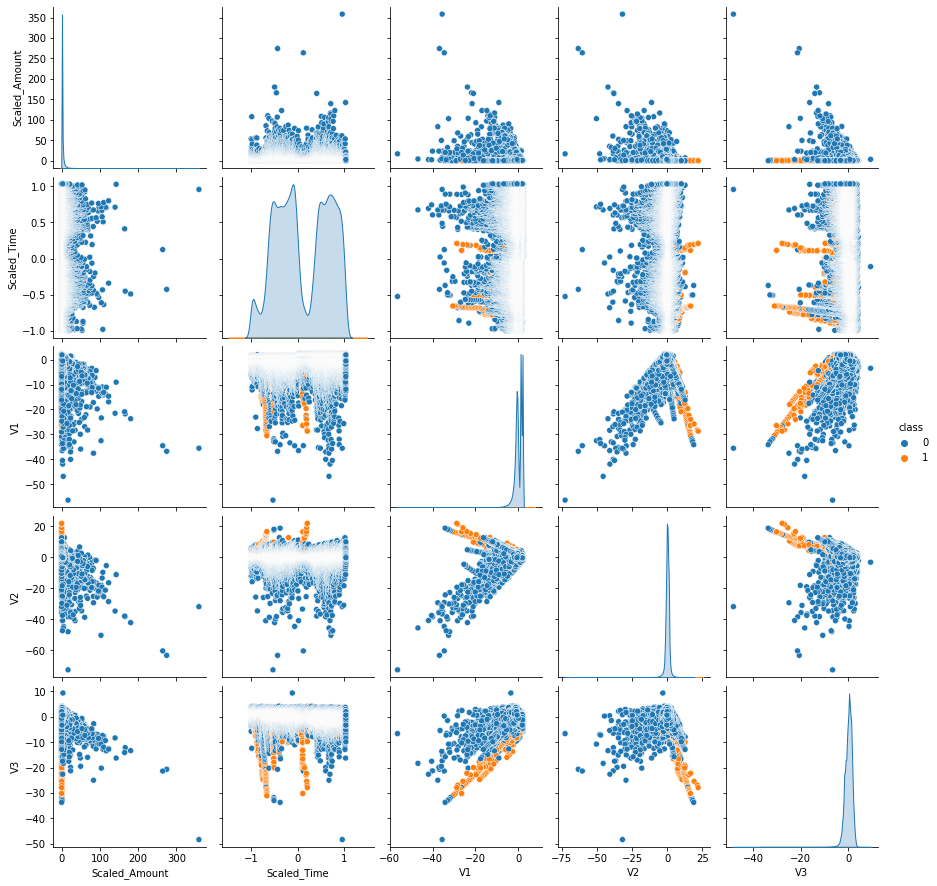

In [47]:
sns.pairplot(df_1,hue='class')

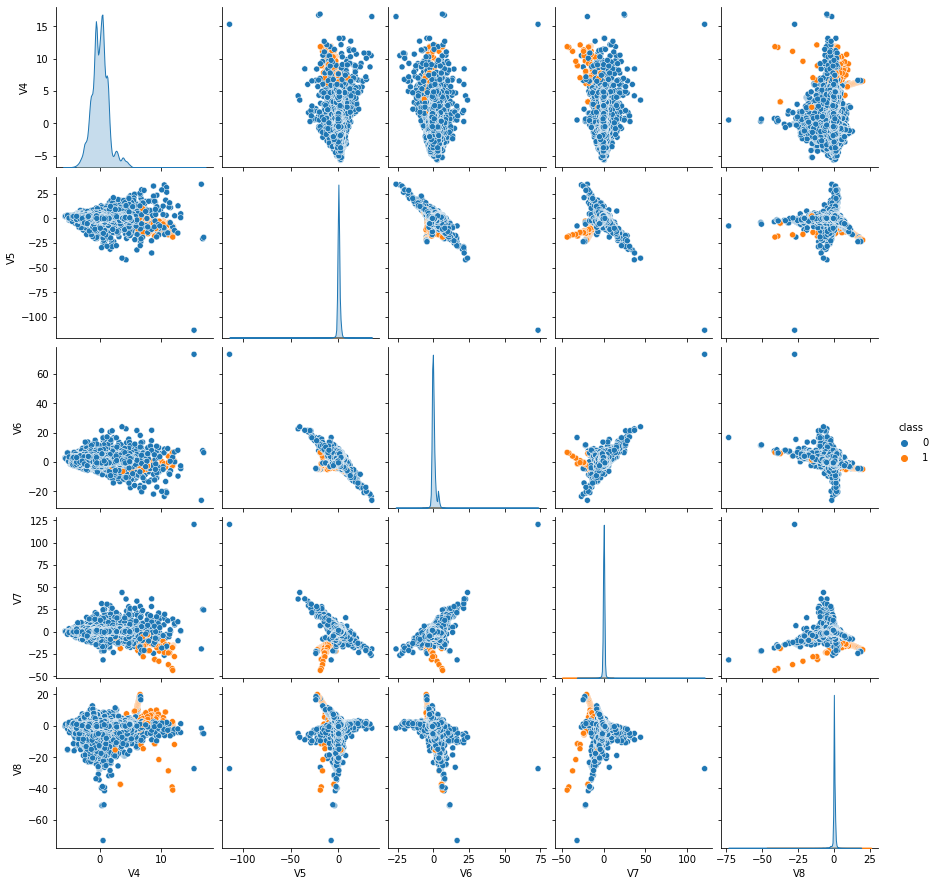

In [48]:
sns.pairplot(df_2, hue = 'class')


In [ ]:
#sns.pairplot(df_3, hue = 'class')

#sns.scatterplot(data=df_first, x="total_bill", y="tip", )
for colname, col in df_first.iteritems():
    
    sns.scatterplot(df_first['class'], df[colname])
    
    for  col in range(len(df_first.columns)-1):
    for colname in df_first.columns:
        sns.scatterplot(data=df_first, x = colname , y="class")

##  Splitting test and train data

In [51]:
from sklearn.model_selection import train_test_split

X = df.drop(['Class'], axis = 1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, 
                                                    stratify = y)

### defining function to print precision, recall, classification_report, roc_auc_score 
* it is a generic function  that will be used in all upcoming mo0dels to calculate accuracy

In [53]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, roc_auc_score

def evaluation(y_actual, predicted):
    cnf_matrix = confusion_matrix(y_actual, predicted)

    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "RdYlGn", fmt = 'g')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    
    labels = ['Non-Fraud', 'Fraud']
    print(classification_report(y_actual, predicted, target_names = labels))

## Logistic Regression with Original Data

In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000)


lr.fit(X_train, y_train)
lr.fit(X_test,y_test)
train_prediction_lr= lr.predict(X_train)
test_prediction_lr = lr.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, roc_auc_score

cnf_train = confusion_matrix(train_prediction_lr,y_train)
cnf_test = confusion_matrix(test_prediction_lr,y_test)

In [56]:
cnf_train, cnf_test

(array([[227418,    166],
        [    33,    228]], dtype=int64),
 array([[56854,    40],
        [   10,    58]], dtype=int64))

In [58]:
def evaluation(y_actual, predicted):
    cnf_matrix = confusion_matrix(y_actual, predicted)

    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "RdYlGn", fmt = 'g')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    
    labels = ['Non-Fraud', 'Fraud']
    print(classification_report(y_actual, predicted, target_names = labels))

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.85      0.59      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962



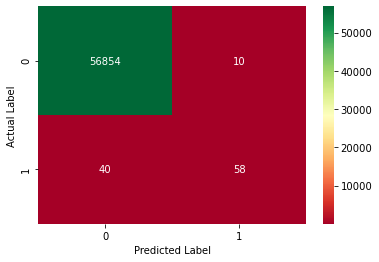

In [59]:
# calling evaluation function 
evaluation(y_test, test_prediction_lr)


We can see that the model is performing poorly for detecting Fraud Transactions. Our model predicted non-fraud transactions 35 times when the transaction was fraud in actual and predicted fraud transactions 11 times where the transaction was indeed non-fraud. Let's have a look at the classification report to get a better understanding.

We can see from the above classification report that the model is able to detect Non_Fraud cases with perfect precision and recall or perfect f1-score. But the model performs very poorly for detecting 'Fraud' cases. Eventhough Precision is high but due to Precision-Recall tradeoff the recall is very poor. In other words, our model is only able to detect only 64 percent of the fraud cases and 85 percent of the times when our model says it's a fraud transaction, the transaction is fault in actual also. As F1 Score is Harmonic Mean of Precision and Recall, it solves the problem of Precision-Recall Tradeoff. The F1-score is pretty less for Fraud cases. Now keeping this as our base performance, let's try to increase our score.

y_pred_prob = lr.predict_proba(X_test)[:,1]

When evaluating tradeoffs for binary classification one must decide whether the priority is precision or recall.
The precision-recall tradeoff is a very challenging problem  when working with imbalanced data and some use cases should prioritize precision
The penalty for mislabeling a fraud transaction as legitimate is having a user’s money stolen, which the credit card company
typically reimburses. On the other hand, the penalty for mislabeling a legitimate transaction as fraud is having the user frozen out of their finances and unable to make payments. There is a very fine tradeoff between these two consequences and we will discuss how to handle this when training a model.
In our use case of fraudulent credit card transactions we give a little more weight to precision than most models do in this case 

In [60]:
y_pred= lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
y_pred_prob_all = lr.predict_proba(X_test)

#y_pred_prob_all = y_pred_prob_all.astype('float')
#y_pred_prob_all = f"{y_pred_prob_all:.9f}"

#the order in which its laid down in the array where index0 is prob of class0 and at index1 is the probability of class 1


Text(0.5, 1.0, 'Precision Recall Curve')

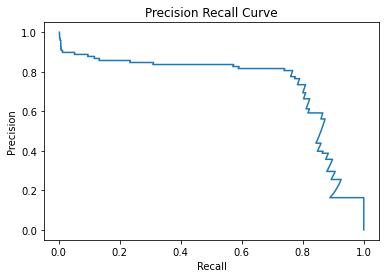

In [62]:
y_pred_prob = lr.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

The difference between predict and predict_proba is that predict will give you output like 0,1. Whereas predict_proba will give
you the probability value of y being 0 or 1.
Using [:,1] in the code will give you the probabilities of getting the output as 1. 
If you replace 1 with 0 in the above code, you will only get the probabilities of getting the output as 0.

In our case it says there is 23% probability of point being 0 and 76% probability of point being 1.

Now where to use predict and predict_proba.
Predict can be used normally to get prediction values.

But suppose you are working on cancer diagnosis problem and you want to be very sure with your results.
So in that case you can use predict_proba which will give you class probability values and you can set some threshold like if predict_proba_value > .98 return class 1 else 0. So basically with the help of predit_proba we can set threshold as per our needs.

In [63]:
print("AUC score is: ", roc_auc_score(y_test, test_prediction_lr))

AUC score is:  0.7958304382529602


Area Under the Curve(AUC) represents the degree or measure of separability or in other words it tells how much chance the model will be able to distinguish between '+' and '-' classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By using Logistic Regression without SMOTE the model will be able to distinguish between '+' and '-' classes 82% of times.



In [64]:
print(" X_train,y_train  before  SMOTE : ", X_train.shape, y_train.shape)
print(" X_test,y_test  before  SMOTE : ", X_test.shape, y_test.shape)

print(" count of the fraud case Before  SMOTE: ", y_train.value_counts().values[1])
print(" count of the fraud case Before  SMOTE:  ", y_train.value_counts().values[0])


 X_train,y_train  before  SMOTE :  (227845, 30) (227845,)
 X_test,y_test  before  SMOTE :  (56962, 30) (56962,)
 count of the fraud case Before  SMOTE:  394
 count of the fraud case Before  SMOTE:   227451


##  oversampling with SMOTE
SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. Specifically, a random example from the minority class is first chosen. This procedure can be used to create as many synthetic examples for the minority class as are required. The approach is effective because new synthetic examples from the minority class are created that are plausible, that is, are relatively close in feature space to existing examples from the minority class. A general downside of the approach is that synthetic examples are created without considering the majority class, possibly resulting in ambiguous examples if there is a strong overlap for the classes.

Before applying SMOTE, we should understand that SMOTE should be applied to only training dataset and not the whole dataset because we will need to test the model on the actual dataset. If we had applied SMOTE to test dataset, there would be many examples which are not real and are generated with help of SMOTE so we shouldn't test our model on those data pointsm

### Note: sampling is done only on Training data, not on test data

In [ ]:
#!pip install imbalanced-learn

In [65]:
from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state = 2)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train.ravel())

print(" X_train,y_train  before  SMOTE : ", X_train.shape, y_train.shape)
print(" X_test,y_test  before  SMOTE : ", X_test.shape, y_test.shape)

print(" count of the fraud case Before  SMOTE: ", y_train.value_counts().values[1])
print(" count of the fraud case Before  SMOTE:  ", y_train.value_counts().values[0])

print()

print("Shape of  X_train,y_train after SMOTE is: ", X_train_s.shape, y_train_s.shape)


print("After  SMOTE the count of the fraud cases: ", sum(y_train_s == 1))
print("After SMOTE the count of the non-fraud cases are: ", sum(y_train_s == 0))

# calculating %
print("After  SMOTE the % of  the fraud cases are: ", sum(y_train_s == 1)/ len(y_train_s) * 100.0)
print("After  SMOTE the % of the non-fraud cases are: ", sum(y_train_s == 0)/ len(y_train_s) * 100.0)


 X_train,y_train  before  SMOTE :  (227845, 30) (227845,)
 X_test,y_test  before  SMOTE :  (56962, 30) (56962,)
 count of the fraud case Before  SMOTE:  394
 count of the fraud case Before  SMOTE:   227451

Shape of  X_train,y_train after SMOTE is:  (454902, 30) (454902,)
After  SMOTE the count of the fraud cases:  227451
After SMOTE the count of the non-fraud cases are:  227451
After  SMOTE the % of  the fraud cases are:  50.0
After  SMOTE the % of the non-fraud cases are:  50.0


## Logistic regression with smote

              precision    recall  f1-score   support

   Non-Fraud       1.00      0.98      0.99     56864
       Fraud       0.06      0.89      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



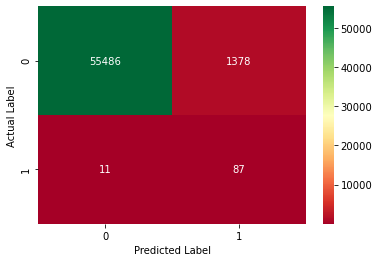

In [66]:
lr_smote = LogisticRegression(max_iter = 1000)
lr_smote.fit(X_train_s, y_train_s)

lr_smote_pred = lr_smote.predict(X_test)
evaluation(y_test, lr_smote_pred)

As compared to the previous model without SMOTE, we can observe that recall value have increased which means that our model is able to detect fraud transactions but the value of precision value have decreased drastically which means that the model has classfied  a lot of non-frauds as frauds whcih is not good for the institution

Text(0.5, 1.0, 'Precision Recall Curve')

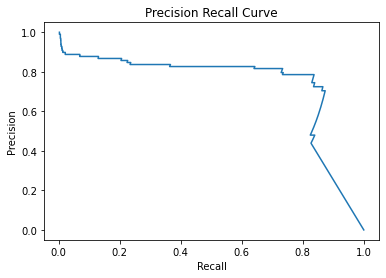

In [68]:
y_pred_prob = lr_smote.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

In [69]:
print("AUC score is: ", roc_auc_score(y_test, lr_smote_pred))

AUC score is:  0.9317609218701549


AUC score has increased to 93%, but this is due to high number of correct predictions for the negative class as suggested
 mby precision value. We need to take into consideration all the evaluation metrics(precision, recall and F1-score).



## Random forest with smote

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.93      0.80      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



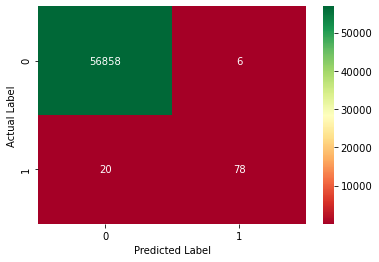

In [71]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 200)

rf.fit(X_train_s, y_train_s)

pred_rf_smote = rf.predict(X_test)

evaluation(y_test, pred_rf_smote)

I think we have found a better model than Logistic Regression, precision value increasead by a hug margin to 0.92 but the value of recall decreased to 0.80. F1-score becomes 0.85 which is the best we have got so far. False Negatives(20) decreased and False Positives(7) have also decreased which means that our model have made only 27 wrong predictions. Let's experiment more to get better results.



Text(0.5, 1.0, 'Precision Recall Curve')

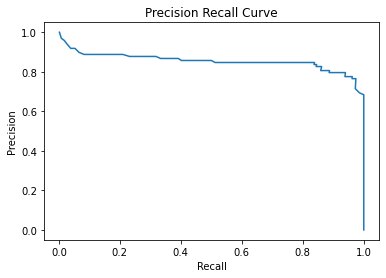

In [72]:
y_pred_prob = rf.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

In [73]:
print("AUC score is: ", roc_auc_score(y_test, pred_rf_smote))

AUC score is:  0.8979064262170822


But AUC score has   reduced.  Let's experiment more to get better results.



## XGBoost
As you might observe that it is taking a lot of time to train a model on such a large dataset which was obtained after applying SMOTE algorithm. Instead of using SMOTE, there is a hyperparameter in XGBoost called scale_pos_weight.

By default, the scale_pos_weight hyperparameter is set to the value of 1.0 and has the effect of weighing the balance of positive examples, relative to negative examples when boosting decision trees. Gradients are used as the basis for fitting subsequent trees added to boost or correct errors made by the existing state of the ensemble of decision trees.

The scale_pos_weight value is used to scale the gradient for the positive class. This has the effect of scaling errors made by the model during training on the positive class and encourages the model to over-correct them. In turn, this can help the model achieve better performance when making predictions on the positive class. A sensible default value to set for the scale_pos_weight hyperparameter is the inverse of the class distribution.

Thus for XGBoost we will try to use this hyperparameter and not SMOTE.

In [74]:
! pip install xgboost

C:\Users\Bharathi Aswath\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.94      0.80      0.86        98

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



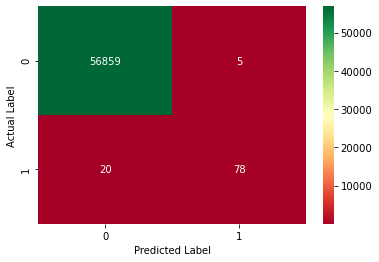

In [75]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(n_estimators = 1000, verbosity = 1, scale_pos_weight = 580)

xgbc.fit(X_train, y_train)

pred_xgb = xgbc.predict(X_test)

evaluation(y_test, pred_xgb)


WOW! Without using SMOTE, the precision value increased to 0.94 and recall to 0.80. FNs remained the same as with Random Forest with SMOTE but FPs decreased to 5, it's great isn't it? F1-score increased by 0.01 to 0.86.



Text(0.5, 1.0, 'Precision Recall Curve')

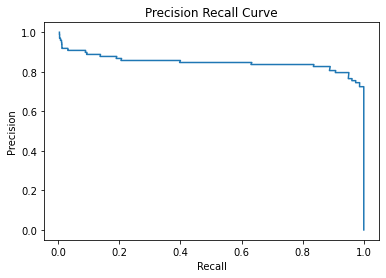

In [76]:
y_pred_prob = xgbc.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

## Feature Engineering :

https://towardsdatascience.com/getting-data-ready-for-modelling-feature-engineering-feature-selection-dimension-reduction-39dfa267b95a

* “You should focus more on getting good features (Feature Engineering) instead of optimizing your model’s hyperparameters (Hy perparameter Tuning). You see… If you don’t have good features that the model can learn from, it will not improve your model’s performance even though you have the optimum hyperparameter,”
* hyperparameter tuning finds an optimal combination of hyperparameters that minimizes a predefined loss function to give better results.Failing to do so would give sub-optimal results as the model didn’t converge and minimize the loss function effectively.

### why feature engineering should come first and hyperparameter tuning should come second?

1. the default values of hyperparameters in most machine learning libraries are sufficient to cater to most use cases. Typically it’s hard to improve performance significantly. At Kaggle, hyperparameter tuning matters a lot. In real life, it hardly matters at all.
2. Hyperparameter tuning is time-consuming and computationally expensive. It takes a lot of time to iterate different combination of hyperparameters to achieve a minor improvement. Even worse, each iteration requires heavy resources if you have a massive amount of data and complex model.  chances are hyperparameter tuning is not needed at all if your model is good enough for deployment given a set of data with great features.
3. It’s extremely difficult to achieve both optimum features and hyperparameters in real life given time constraints. Therefore, to achieve great results with quantum leap of improvement at a shorter time period, a more intelligent choice is to first perform feature engineering to represent the problem well enough so that models can learn and predict accurately. Only after we have great features, then can we consider tuning hyperparameters if time allows or required by business context. This is the main reason

https://towardsdatascience.com/why-you-should-do-feature-engineering-first-hyperparameter-tuning-second-as-a-data-scientist-334be5eb276c

## Feature Selection
There are about 30 features given in the dataset, as we don't know the names for 25 columns, we can't judge whether those features are related to the Class in real life. Let's try out various methods which can help us to decide some important features.

First, let's check out the variance of each column. The simplest form of selecting features would be to remove features with very low variance. If the features have a very low variance, they are close to being constant and thus do not add any value to any model at all.
It would just be nice to get rid of them and hence lower the complexity.

### 1.variance_checking
Usually we delete those columns having variance less than 0.1, but here all features have column greater than 0.1 thus we will retain all the features

In [77]:
df.var()

Scaled_Amount    12.215067
Scaled_Time       0.311256
V1                3.836489
V2                2.726820
V3                2.299029
V4                2.004684
V5                1.905081
V6                1.774946
V7                1.530401
V8                1.426479
V9                1.206992
V10               1.185594
V11               1.041855
V12               0.998403
V13               0.990571
V14               0.918906
V15               0.837803
V16               0.767819
V17               0.721373
V18               0.702539
V19               0.662662
V20               0.594325
V21               0.539526
V22               0.526643
V23               0.389951
V24               0.366808
V25               0.271731
V26               0.232543
V27               0.162919
V28               0.108955
Class             0.001725
dtype: float64

### 2. Recursive Feature Elimination
Till now we have trained our model on all the features of a dataset, there might be some correlated features which are decreasing the evaluation metrics score, let's try a method called 'Recursive Feature Elimination'. In this method, we start with all the features and keep removing one feature in every iteration that provides the least value to a given model. In each iteration, we can eliminate the least important features and keep eliminating it until we reach the number of features needed.

In [78]:
from sklearn.feature_selection import RFE
model = XGBClassifier(n_estimators = 500, verbosity = 1, scale_pos_weight = 580)
selector = RFE(model, n_features_to_select = 15, step=1)
selector.fit(X_train, y_train)

C:\Users\Bharathi Aswath\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:24:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Bharathi Aswath\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:28:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Bharathi Aswath\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:31:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Bharathi Aswath\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:34:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Bharathi Aswath\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:38:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Bharathi Aswath\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:41:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Bharathi Aswath\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Bharathi Aswath\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:46:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Bharathi Aswath\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:50:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Bharathi Aswath\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Bharathi Aswath\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:56:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Bharathi Aswath\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:59:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Bharathi Aswath\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:02:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Bharathi Aswath\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:04:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Bharathi Aswath\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:07:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Bharathi Aswath\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:08:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RFE(estimator=XGBClassifier(base_score=None, booster=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, gamma=None, gpu_id=None,
                            importance_type='gain',
                            interaction_constraints=None, learning_rate=None,
                            max_delta_step=None, max_depth=None,
                            min_child_weight=None, missing=nan,
                            monotone_constraints=None, n_estimators=500,
                            n_jobs=None, num_parallel_tree=None,
                            random_state=None, reg_alpha=None, reg_lambda=None,
                            scale_pos_weight=580, subsample=None,
                            tree_method=None, validate_parameters=None,
                            verbosity=1),
    n_features_to_select=15)

First we will retain 15 features out of 30.

In [79]:
selector.support_

array([ True, False,  True, False,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False])

In [80]:
a = selector.support_
true_index = [i + 1 if a[i] == True else False for i in range(0, len(a))]
selected_cols = []
cols = df.columns
for i in true_index:
    if i == False:
        pass
    else:
        selected_cols.append(cols[i - 1])
        
print("15 selected features are: ", selected_cols)

15 selected features are:  ['Scaled_Amount', 'V1', 'V3', 'V4', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V18', 'V19', 'V20']


              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.90      0.79      0.84        98

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



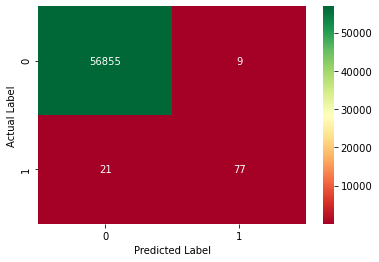

In [81]:
prediction_rfe = selector.predict(X_test)
evaluation(y_test, prediction_rfe)

We can observe that the XGB model trained on all the features was a little better than this model. This model have misclassified 30 data points and the F1-score is less by 0.01.

This model is better than the previous model which was trained on 15 features. It misclassifies 27 data points. The F1-score is similar to that of XGBoost. 
This indicates that the increase in number of features is benefitting the model.

Text(0.5, 1.0, 'Precision Recall Curve')

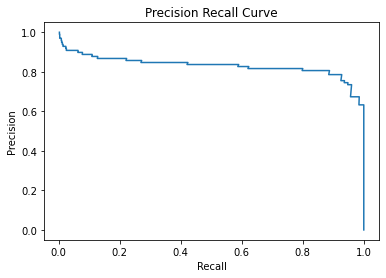

In [84]:
y_pred_prob = selector.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')


In [85]:
print("AUC score is: ", roc_auc_score(y_test, prediction_rfe))

AUC score is:  0.8927780066725619


the AUC score does not have major difference.
Now let's increase the number of features to be selected to 20.

In [ ]:
model1 = XGBClassifier(n_estimators = 1000, verbosity = 1, scale_pos_weight = 580)
selector1 = RFE(model1, n_features_to_select = 20, step = 1)
selector1.fit(X_train, y_train)

In [ ]:
selector1.support_

In [ ]:
b = selector1.support_
true_index = [i + 1 if b[i] == True else False for i in range(0, len(b))]
selected_cols = []
cols = df.columns
for i in true_index:
    if i == False:
        pass
    else:
        selected_cols.append(cols[i - 1])
        
print("20 selected features are: ", selected_cols)

In [ ]:
prediction_rfe1 = selector1.predict(X_test)
evaluation(y_test, prediction_rfe1)

In [82]:
y_pred_prob = selector1.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

NameError: name 'selector1' is not defined

In [ ]:
print("AUC score is: ", roc_auc_score(y_test, prediction_rfe1))

In [ ]:
Recursive Feature Elimination is one of the ways through which we can select some of the most important features.
There are other methods like SelectKBest,removing correlated features etc.

# Creating a pickle file 
* we are going with xgboost classifier.

In [87]:
import pickle
# open a file, where you want to store the data
file = open('ccfraud_xgbc.pkl', 'wb')

# dump information to that file
pickle.dump(xgbc, file)


# MYCODE

In [ ]:

imp_features=pd.Series(model.feature_importances_, index = X.columns)
imp_features
# plotting graph to find most important features
imp_features.nlargest(5).plot(kind='barh')
plt.show()

# other ways to find feature_importance
# only for xgboost

from xgboost import plot_importance
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()

model = XGBClassifier()
model.fit(X, y)
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [ ]:
##  Random Forest hyperparameter tuning using griddsearchcv
Hyperparameter optimization of statistical models is often done through a procedure known as cross-validation, consisting of 
holding out a set of samples for evaluation and selecting the hyperparameter that leads to the models optimal performance
goal is to find an optimal combination of hyperparameters that minimizes a predefined loss function to give better results.
Failure to do so would give sub-optimal results as the model didn’t converge and minimize the loss function effectively.

In [ ]:
#original dataset = x_train,y_train
# smote_upsampled_dataset = x_train_s,y_train_s

#hyperparameter tuning with RF smote(oversampled data)
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]


params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=1, n_jobs=-1)


rf_cv.fit(X_train_s, y_train_s)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit( X_train_s, y_train_s)


Oversampling with (SMOTE) can be done before training. However there is a catch. SMOTE reduces the majority class as well hence there is a chance of loosing valuable information.
My approach is as follows: ( this has been tremendously successful in most of the work I have done).
I tend to impute only minority class using SMOTE and then add that back to the original data. This helps to improve the prior probability of the minority class and during posterior estimation using any machine learning model helps to get a better decision boundary with confidence.
I call it "Targeted SMOTE" as I take only the minority class imputation from SMOTE and add it back to the original data.
Now you can divide this set for training and testing and CV as well , it would work just fine.
Try to check the performance of this model on a holdout sample data without SMOTE which you must keep aside before SMOTE to do an acid test. I am sure you will find fantastic resul

### Should oversampling be done before or during cross-validation?
   
1) perform oversampling before executing cross-validation;
2) perform oversampling during cross-validation, i.e. for each fold, oversampling is performed before training, and this process is repeated for each fold. 
Case 1 is more efficient but model selection is done on the basis of the average performance on data including artificial data;
case 2 is less performant but includes oversampling as a part of the model selection process. Which approach is most suitable?

In Case 1), as the entire original data is oversampled and the cross-validation is performed afterwards, 
similar examples (or exact replicas, depending on the oversampling algorithm applied) may appear in both the training and test partitions. Therefore, Case 1) seems more “efficient” because we are over-estimating the classification performance. This is known as the issue of “overoptimism”, introduced by a faulty CV design.
Case 2) is the correct way of handling imbalanced data, although proper care should be taken when choosing an oversampling algorithm (e.g. choosing algorithms that create exact replicas of original examples may lead to overfitting).
The following paper may be useful, as it compares Case 1) versus Case 2) (i.e.  oversampling before cv and  oversampling during cv)

https://www.researchgate.net/publication/328315720_Cross-Validation_for_Imbalanced_Datasets_Avoiding_Overoptimistic_and_Overfitting_Approaches
 *  Many works prefer oversampling during cross-validation.

In [94]:
xg_prediction = xgbc.predict(X)

In [100]:
prediction = pd.DataFrame(xg_prediction, columns=['predictions']).to_csv('ccfraud_prediction.csv')

AttributeError: 'NoneType' object has no attribute 'head'